# Part A: The structure of the Philosopher network

In [1]:
import urllib2
import json
import re
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


philosophers = {
    "aestheticians":{
        "title":"title=List_of_aestheticians",
        "names":""
    },
    "epistemologists":{
        "title":"title=List_of_epistemologists",
        "names":""
    },
    "ethicists":{
        "title":"title=List_of_ethicists",
        "names":""
    },
    "logicians":{
        "title":"title=List_of_logicians",
        "names":""        
    },
    "metaphysicians":{
        "title":"title=List_of_metaphysicians",
        "names":""
    },
    "social and political philosophers":{
        "title":"title=Index_of_sociopolitical_thinkers",
        "names":""
    }
}

#'https://en.wikipedia.org/w/index.php?title=List_of_aestheticians&action=edit'

# set the parameters (explained in detail here https://www.mediawiki.org/wiki/API:Tutorial)
baseurl = "https://en.wikipedia.org/w/index.php?"
title = ""
action = "action=edit"

for i in philosophers:
    # construct the query
    query = "{}{}&{}".format(
    baseurl,
    philosophers[i]["title"],
    action)
    # use urllib and regex to get the list of philosophers
    wikiresponse = urllib2.urlopen(query)
    wikisource = wikiresponse.read()
    philosophers[i]["names"] = re.findall(r'\*.*?\[\[(.*?)[\]\|]', wikisource)

# Because the last 4 elements of the ethicists list and social and political philosophers are not philosophers
# they are left out
philosophers["ethicists"]["names"] = philosophers["ethicists"]["names"][:-4]
philosophers["social and political philosophers"]["names"] = philosophers["social and political philosophers"]["names"][:-4] 

/Users/GretarAtli/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
all_philo = []
largestBranch = ""
temp = 0 # temp variable used to find the largest brand
for i in philosophers:
    all_philo = all_philo + philosophers[i]["names"]
    print "The number of philosophers in {} is {}".format(
        i,
        len(philosophers[i]["names"]))
    if len(philosophers[i]["names"]) > temp:
        temp = len(philosophers[i]["names"])
        largestBranch = i
        
print "\nThe largest branch of philosophy is {}".format(largestBranch)

# Check if there are some philosophers that are in more than one list
import collections

philoCounted = collections.Counter(all_philo)
nrOfDublicates =len([philo for philo,value in philoCounted.items() if value > 1])

print "\n Yes, There are {} philosophers that are in more than one link".format(nrOfDublicates)

# Find the most common ones
most_common = [philo for philo,value in philoCounted.items() if value == philoCounted.most_common(1)[0][1] ]
print("\nThe most common ones are:")

for i in most_common:
    print "  {}".format(i)

# print out everyone that appears in more than one list 
print("")
print("All philosophers that appear more than one list")
philoCounted = sorted(philoCounted.items(), key=lambda pair: pair[1], reverse=True)
for i,value in philoCounted:
    if value > 1:
        print "{}:{} number of times".format(i,value)

The number of philosophers in social and political philosophers is 334
The number of philosophers in aestheticians is 124
The number of philosophers in logicians is 277
The number of philosophers in epistemologists is 100
The number of philosophers in metaphysicians is 97
The number of philosophers in ethicists is 271

The largest branch of philosophy is social and political philosophers

 Yes, There are 121 philosophers that are in more than one link

The most common ones are:
  Thomas Aquinas
  Aristotle

All philosophers that appear more than one list
Thomas Aquinas:6 number of times
Aristotle:6 number of times
Plato:5 number of times
Bertrand Russell:5 number of times
Immanuel Kant:5 number of times
David Hume:4 number of times
Baruch Spinoza:3 number of times
Gottfried Leibniz:3 number of times
Georg Wilhelm Friedrich Hegel:3 number of times
Nelson Goodman:3 number of times
Robert Nozick:3 number of times
Ludwig Wittgenstein:3 number of times
Francis Bacon:3 number of times
Søren 

In [3]:
import json
import re
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Delete duplicates in the list
all_philo = set(all_philo)

for philo in all_philo:
    # Add the philosopher to the graph
    G.add_node(philo)
    
    # Create the uri for the file in the os file system
    fileUri = "/Users/GretarAtli/Dropbox/Dtu/Social_graphs_and_interactions/Philosophers/{}.txt".format(philo.replace(" ","_"))

    # Open the file and get the content 
    file = open(fileUri) 
    theArticle = file.read()

    # use regex and the set.intersection function to find all philosophers that are linked from the 
    # wikipage of each philosopher
    linkedPhilosophers = set(re.findall(r'.*?\[\[(.*?)[\]\|]', theArticle)).intersection(all_philo)

    # Go through all the linked philosophers and add directed edge for each one
    for linkedPhilosopher in linkedPhilosophers:
        G.add_edge(philo,linkedPhilosopher)
        
    # Debugging purpose
    print "The philospher is {}\n   And the linked philo list is: {}".format(philo,linkedPhilosophers)


The philospher is Christian Wolff (philosopher)
   And the linked philo list is: set(['Thomas Aquinas', 'Confucius', 'Voltaire', 'Arthur Schopenhauer', 'Immanuel Kant', 'Aristotle', 'Moses', 'Alexander Gottlieb Baumgarten', 'Gottfried Leibniz'])
The philospher is Eli Siegel
   And the linked philo list is: set(['Immanuel Kant', 'Martin Buber', 'Aristotle', 'Heraclitus'])
The philospher is Marsilius of Inghen
   And the linked philo list is: set(['William of Ockham', 'Albert of Saxony (philosopher)', 'Jean Buridan', 'Aristotle', 'Thomas Bradwardine'])
The philospher is Solomon Passy
   And the linked philo list is: set([])
The philospher is Heinrich Gustav Hotho
   And the linked philo list is: set([])
The philospher is Isaiah Berlin
   And the linked philo list is: set(['Leo Tolstoy', 'Richard Wollheim', 'A. J. Ayer', 'Plato', 'John Stuart Mill', 'Joxe Azurmendi', 'John Rawls', 'Friedrich Nietzsche', 'Ludwig Wittgenstein', 'Johann Gottfried Herder', 'Karl Marx', 'Giambattista Vico'])
T

* Why do you think I want you guys to use a directed graph? Could have we used an undirected graph instead?
What is the total number of nodes in the network? What is the total number of links? What's the average degree? What's the median degree?
* List the top 10 philosophers by in-degree and out-degree. What is the interpretation of in-degree and out-degree in this case? Have you heard about these philosophers before?
* Plot the distribution of in-degrees and out-degrees, binned using numpy.histogram. What is the most common degree?
* Plot the distribution of in-degrees and out-degrees one more time, this time plotted loglog scale.
* Describe the distributions (as you would in a well written figure caption). Do they look Poissonian? Power-law? Something in between?
* Plot a scatter plot of the the in- versus out- degree for all philosophers using a loglog scale. Comment on the relation between the two.

In [4]:
print "The network statistics: \n"
print "   The total number of nodes: {} ".format(len(G.nodes()))
print "   The total number of edges: {} ".format(len(G.edges()))
print "   The average degree: {} ".format(np.mean(G.degree().values()))
print "   The median degree: {} ".format(np.median(G.degree().values()))

# Note According to the documentation of numpy.median, 
# you don't have to manually sort the data before feeding it to the function, as it does this internally. 

top10indegrees = sorted(G.in_degree().items(),key=lambda pair: pair[1], reverse=True)[:10]
top10outdegrees = sorted(G.out_degree().items(),key=lambda pair: pair[1], reverse=True)[:10]

print "\nTop 10 philosophers by in-degree: \n"
for philo,value in top10indegrees:
    print "   {} : in degree = {} ".format(philo,value)
    
print "\nTop 10 philosophers by out-degree: \n"
for philo,value in top10outdegrees:
    print "   {} : out degree = {} ".format(philo,value)


The network statistics: 

   The total number of nodes: 1047 
   The total number of edges: 4781 
   The average degree: 9.13276026743 
   The median degree: 4.0 

Top 10 philosophers by in-degree: 

   Immanuel Kant : in degree = 136 
   Aristotle : in degree = 126 
   Plato : in degree = 95 
   Karl Marx : in degree = 95 
   Bertrand Russell : in degree = 85 
   Friedrich Nietzsche : in degree = 75 
   Ludwig Wittgenstein : in degree = 69 
   David Hume : in degree = 68 
   Georg Wilhelm Friedrich Hegel : in degree = 66 
   John Stuart Mill : in degree = 59 

Top 10 philosophers by out-degree: 

   Friedrich Nietzsche : out degree = 43 
   Bertrand Russell : out degree = 41 
   Georg Wilhelm Friedrich Hegel : out degree = 40 
   Jacques Derrida : out degree = 37 
   Martin Heidegger : out degree = 36 
   Immanuel Kant : out degree = 35 
   David Hume : out degree = 35 
   Plato : out degree = 33 
   Søren Kierkegaard : out degree = 33 
   Jean-Jacques Rousseau : out degree = 33 


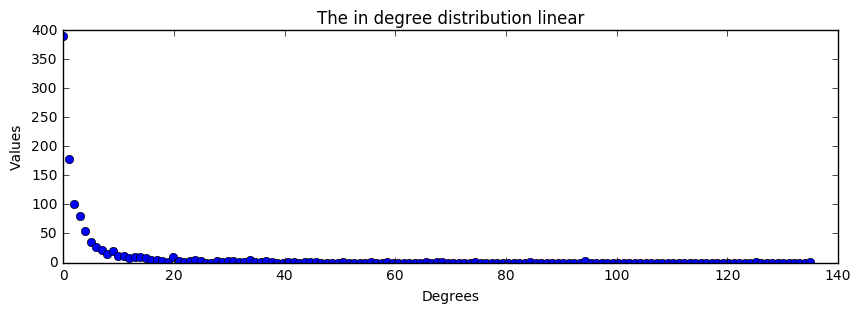

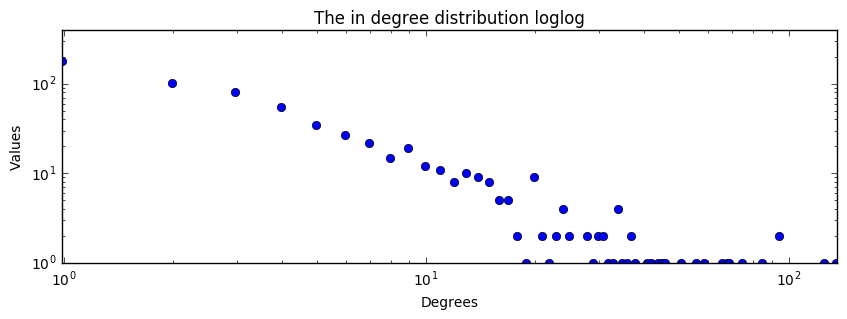

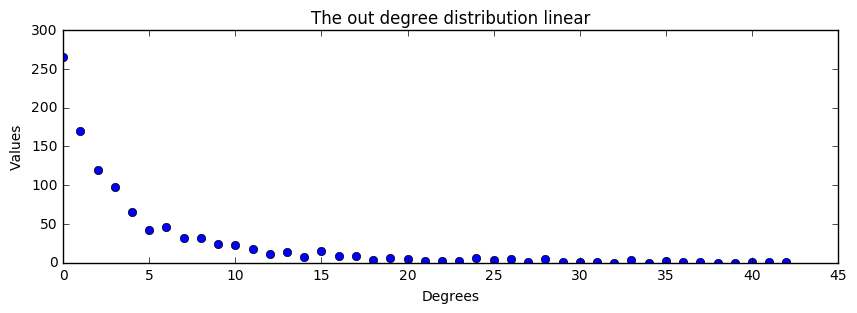

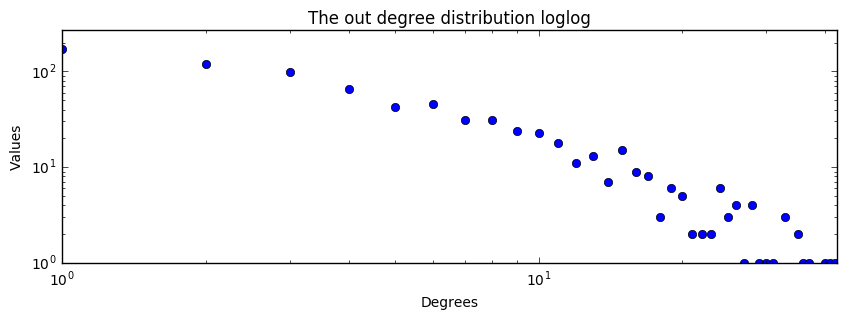

In [5]:
# Plot the in and out degrees

# lets start with the in degree
valuesIn, binsIn = np.histogram(G.in_degree().values(), bins=137)

# Plot the distribution, both linear and log-log axes
plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(binsIn[:-1], valuesIn,'o')
#plt.xlim(min(range(0,len(values))), max(range(0,len(values))))
plt.title("The in degree distribution linear")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(binsIn[:-1], valuesIn,'o')
plt.margins(0.01,0.01)
plt.xscale('log')
plt.yscale('log')
plt.title("The in degree distribution loglog")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

# now lets check out the out degree
valuesOut, binsOut = np.histogram(G.out_degree().values(), bins=43)

# Plot the distribution, both linear and log-log axes
plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(binsOut[:-1], valuesOut,'o')
#plt.xlim(min(range(0,len(values))), max(range(0,len(values))))
plt.title("The out degree distribution linear")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(binsOut[:-1], valuesOut,'o')
plt.margins(0.01,0.01)
plt.xscale('log')
plt.yscale('log')
plt.title("The out degree distribution loglog")
plt.xlabel("Degrees")
plt.ylabel("Values")
plt.show()

### Plot interpretation

The plots do not look like poission or exponential distributions. They have some characteristics of a power law distribution, like there are some philosophers that have really high out/in degrees. These are called outliers. It makes sens if you think about it. Famous philosophers like Immanuel Kant, Aristotle and Plato have a lot of cites to their wikipage from other philosopher's wikipages. A lot of modern philosophy is based on the work of these philosophers so their works will be cited alot. The outliers in the out degree are most likely new philosophers that are citeing the works of older philosophers. 

Neither distributions have loglog plots that looks completely like power law so this is not strightly a power law distribution, these distribution look simmilar to log normal distributions but the distribution lies somewhere inbetween.


** Hugmynd **: plotta up bæði poission og exponential distributions onto the graph

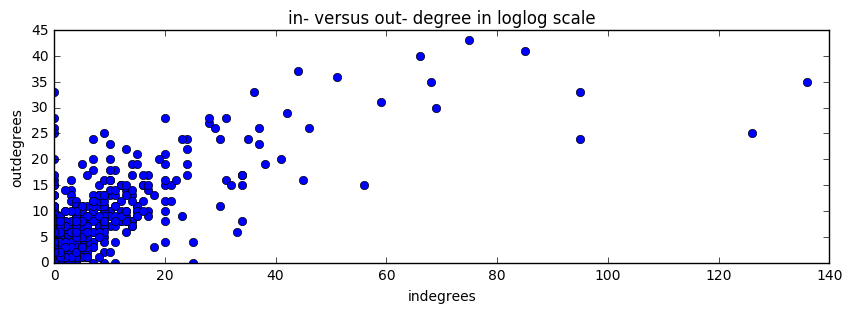

In [6]:
indegrees = [indegree for philo, indegree in sorted(G.in_degree().items(),key=lambda pair: pair[0])]
outdegrees = [outdegree for philo, outdegree in sorted(G.out_degree().items(),key=lambda pair: pair[0])]

# Plot in-versus out- degree in log-log axes
plt.figure(num=None, figsize=(10,3), dpi=80, facecolor="w", edgecolor="k")
plt.plot(indegrees, outdegrees,'o')

#plt.xlim(min(range(0,len(values))), max(range(0,len(values))))
plt.title("in- versus out- degree in loglog scale")
plt.xlabel("indegrees")
plt.ylabel("outdegrees")
plt.show()


**Exercise: Going in depth with the structure of the the philosopher network**

Above, we found the most connected philosophers (using degree centrality). Now let's dig in and try to understand more about the philosopher network using more advanced network features. If your network has more than one component, just work on the giant connected component (GCC) in the exercises below (in a directed graph use the [weakly connected component](https://networkx.github.io/documentation/networkx-1.9.1/reference/algorithms.component.html)).

 - Not all of the measures we'll be considering below are defined for directed graphs, thus begin by creating an undirected version of the philosopher graph, that we can use whenever needed. Only use the [undirected graph](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.DiGraph.to_undirected.html) when explicitly stated in the exercise.
 - Find the 5 most central philosophers according to [betweenness centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.betweenness_centrality.html). What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?
 - Find the 5 most central philosophers according to [eigenvector centrality](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.centrality.eigenvector_centrality.html). Calculate centrality corresponding to both in- and out-edges (see NetworkX documentation for details). How is eigenvector centrality difference from degree centrality? Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?
 - Is the undirected version of the graph [assortative with respect do degree](https://networkx.github.io/documentation/networkx-1.9.1/reference/generated/networkx.algorithms.assortativity.degree_assortativity_coefficient.html#networkx.algorithms.assortativity.degree_assortativity_coefficient)? (e.g. do high-degree philosophers tend to link to other high-degree philosophers, and low-degree philosophers to other low-degree philosophers?). Provide an interpretation of your answer? **TODO gera þetta**

** Find the 5 most central philosophers according to betweenness centrality. **

** Betweenness Centrality: **
Is a centrality measure of a vertex within a graph. Vertices that occur on many shortest path between other vertices have higher betweenness than those that do not.

In [33]:
# Let's start this fun by creating a undirected subgraph of the directed philo graph

ud_G =  G.to_undirected()

# get the giant connected component
giant_G = max(nx.weakly_connected_component_subgraphs(G), key=len)
giant_ud_G = max(nx.connected_component_subgraphs(ud_G), key=len)

# Find the 5 most central philosophers according to betweenness centrality
centrality_between = sorted(nx.betweenness_centrality(giant_G).items(),key=lambda pair:pair[1], reverse=True)

print "5 most central philosophers according to betweenness centrality"
for name,value in centrality_between[:5]:
    print "   {}: {}".format(name,value)



5 most central philosophers according to betweenness centrality
   Immanuel Kant: 0.0779679339714
   Bertrand Russell: 0.0773642049983
   Plato: 0.0549977520939
   Aristotle: 0.0521037567493
   David Hume: 0.0474545441655


**What role do you imagine philosophers with high wikipedia graph betweenness centrality play in the history of philosophy?**

They are the fundamental philosophers, meaning that the work of other philosophers are based on the works of these philosopher. Therefore they appear on many shortest path between vertices in the graph because the work of many philosophers are based on these fundemental theores that these philosophers found out.

** Find the 5 most central philosophers according to eigenvector centrality **
** Eiginvectors Centrality: ** Is a measure of the importance of a node in a Network. It assigns relative scores to all nodes in a network based on the principle that connections to high scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes..

In [62]:
# TODO athuga þetta betur
# Find the 5 most central philosophers according to eiginvector centrality
centrality_eiginvector_indegree = sorted(nx.eigenvector_centrality(giant_G).items(),key=lambda pair:pair[1], reverse=True)
print "\n5 most central philosophers according to indegree eiginvector centrality"
for name,value in centrality_eiginvector_indegree[:5]:
    print "   {}: {}".format(name,value)
    
centrality_eiginvector_outdegree = sorted(nx.eigenvector_centrality(giant_G.reverse()).items(),key=lambda pair:pair[1], reverse=True)
print "\n5 most central philosophers according to outdegree eiginvector centrality"
for name,value in centrality_eiginvector_outdegree[:5]:
    print "   {}: {}".format(name,value)


5 most central philosophers according to indegree eiginvector centrality
   Immanuel Kant: 0.314990076192
   Aristotle: 0.257368174487
   Bertrand Russell: 0.242190542357
   Friedrich Nietzsche: 0.228910325557
   Plato: 0.223659217528

5 most central philosophers according to outdegree eiginvector centrality
   Friedrich Nietzsche: 0.185731338292
   Martin Heidegger: 0.172742571761
   Jacques Derrida: 0.17065751498
   Georg Wilhelm Friedrich Hegel: 0.160537233924
   Michel Foucault: 0.154077710589


**How is eigenvector centrality difference from degree centrality?**
    - Eiginvector centrality depends on the degree of the nodes that lead to you. If a node with very high degree leads to you, thats more important than bunch on non important(low degree nodes) nodes that leads to you.
**Compare your results for eigenvector centrality to the results for betweenness centrality - does the difference make sense when you read the philosopher's wikipedia pages?**
    - 

** Is the undirected version of the graph assortative with respect do degree**

In [8]:
print "assortativity coefficient for undirected graph : {}".format(
    nx.degree_assortativity_coefficient(giant_ud_G))

print "assortativity coefficient for directed graph : {}".format(
    nx.degree_assortativity_coefficient(giant_G))

print "assortativity coefficient for directed graph r(in,in) : {}".format(
    nx.degree_assortativity_coefficient(giant_G,x="in",y="in"))

print "assortativity coefficient for directed graph r(out,out) : {}".format(
    nx.degree_assortativity_coefficient(giant_G,x="out",y="out"))

assortativity coefficient for undirected graph : -0.0843215549686
assortativity coefficient for directed graph : 0.00248879386794
assortativity coefficient for directed graph r(in,in) : -0.0139373344407
assortativity coefficient for directed graph r(out,out) : 0.0514646505144


 ** Theory **
 - The assortativity coefficient is the Pearson correlation coefficient of degree between pairs of linked nodes. Positive values of r indicate a correlation between nodes of different degree. 
 -  In general, r lies between −1 and 1. When r = 1, the network is said to have perfect assortative mixing patterns, when r = 0 the network is non-assortative, while at r = −1 the network is completely disassortative.
 - In a Directed graph, in-assortativity r{(in,in)} and out-assortativity r{(out,out)} measure the tendencies of nodes to connect with other nodes that have similar in and out degrees as themselves, respectively
 
**Answer**
- The assortativity coefficient for the undirected version of the graph is -0.08384, so there is a small relationship between nodes of different degrees but the correlation is very small. This is understandable because philosophers with low numbers of citation (younger and not as well known philosophers) tend to link to more known philosophers that have higher number of citations (like Aristoteles for example). But that being said there does not seem to be much correlation between nodes of similar degrees and therefore it can be concluded that high degree philosophers do not tend to link to other high degree philosophers and low degree philosopher do not tend to link to other low degree philosophers.

Conclusion = There is not much correlation between nodes of similar degrees. 

 

** Exercises: Age and structure in the philosopher network  TODO** 

Exercises: Age and structure in the philosopher network

Age of the philosophers plays a large role. Socrates/Plato and Aristotle are massive influences on philosophy in millennia subsequent to their birth. Now, let us explore how the birth-year of the philosophers plays a role in shaping the network. We've created a file (.json format) which provides the birth year for most of the philosophers. Get it here. In the following, you may use that to get the birth-year for the philosopher. Note: It's possible that the list of names in the list of birth-years is not identical to the set of nodes in your network; thus, for the exercises including age, simply work on the subgraph of nodes for which you have age-info.

- Create a histogram of the number of philosophers born in every century, starting 500 BC. Describe the plot. Does philosophy seem to have developed at a steady pace - or in a more bursty manner? Are we living in a golden age of philosophy right now? (Use the data & common sense to present an argument for your answer).
- Is the undirected version of the graph assortative with respect to age? Once again, please provide a discussion of your findings.
    - **Note 1:** The NetworkX assortativity coefficient works on categorical data, thus I recommend you represent each philosopher's age by their century of birth rather than birth year.
    - **Note 2:** Alternatively you can write your own algorithm to calculate age-assortativity, use the strategy behind degree correlations - see this paper's Equation (21).
- A reasonable hypothesis is that old philosophers are more famous. Create a scatter-plot of age versus in-degree. Do you see a correlation between the two? Justify your answer (for example by calculating the correlation coefficient.)

In [9]:
import json
import io

with open('philo_age.json') as json_data:
    d = json.load(json_data)
    print(d)

{u'Marsilius of Inghen': 1330, u'Gaius Marius Victorinus': 300, u'Paul Carus': 1852, u'Carlo Cattaneo': 1801, u'Nicholas of Cusa': 1401, u'Paul Ramsey (ethicist)': 1913, u'W. V. O. Quine': 1908, u'Sergei Iosifovich Hessen': 1887, u'Dong Zhongshu': 176, u'Claude L\xe9vi-Strauss': 1908, u'James Hopwood Jeans': 1877, u'Jakob Sigismund Beck': 1761, u'Octave Hamelin': 1856, u'Plato': -427, u'Robert Desgabets': 1610, u'Joseph Mar\xe9chal': 1878, u'William of Shyreswood': 1190, u'Linus Pauling': 1901, u'Richard B. Brandt': 1910, u'Henry Suso': 1300, u'Matthew Arnold': 1822, u'Nishitani Keiji': 1900, u'Juli\xe1n Mar\xedas': 1914, u'Akos Pauler': 1876, u'Luitzen Egbertus Jan Brouwer': 1881, u'Benjamin Constant': 1767, u'Arthur Edward Murphy': 1901, u'Lucien L\xe9vy-Bruhl': 1857, u'Georges Florovsky': 1893, u'Carl Jung': 1875, u'Lewis H. Morgan': 1818, u'Johann Heinrich Pestalozzi': 1746, u'Aron Gurwitsch': 1901, u'Jean-Fran\xe7ois Lyotard': 1924, u'Mozi': -470, u'Monroe Beardsley': 1915, u'Clau

In [10]:
counter = 0

for key,age in d.items():
    for philo in all_philo:
        if philo == key:
            print key,age
            counter += 1 
    #if key in all_philo:
    #    print key,age
    #    counter += counter + 1

Marsilius of Inghen 1330
Dong Zhongshu 176
Plato -427
Luitzen Egbertus Jan Brouwer 1881
Lewis H. Morgan 1818
Mozi -470
Monroe Beardsley 1915
William K. Frankena 1908
Heraclitus -535
Martin Buber 1878
B. F. Skinner 1904
Houston Stewart Chamberlain 1855
Petrus Ramus 1515
G. E. M. Anscombe 1918
Georg Cantor 1845
Bernard Bolzano 1781
Nicolas Malebranche 1638
Hayashi Razan 1583
C. D. Broad 1887
Xenocrates -396
Gottfried Leibniz 1646
Shadworth Hodgson 1832
Friedrich Nietzsche 1844
Friedrich Engels 1820
Walter Burley 1275
Edmund Burke 1729
Cicero -106
Lynne Rudder Baker 1944
Giorgio Del Vecchio 1878
Henry David Thoreau 1817
Franz Xaver von Baader 1765
Richard Kilvington 1302
Galileo Galilei 1564
Diodorus Cronus -300
Allan Gibbard 1942
Max Stirner 1806
David Gauthier 1932
Marilyn McCord Adams 1943
Karl Wilhelm Ferdinand Solger 1780
James Frederick Ferrier 1808
David Bohm 1917
H. Richard Niebuhr 1894
Nelson Goodman 1906
John Searle 1932
Jacques Maritain 1882
William of Ockham 1285
Paul of Venic

/Users/GretarAtli/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pierre Teilhard de Chardin 1881
Stanley Cavell 1926
Francis Hutcheson (philosopher) 1694
Lorenzo Valla 1406
Fred Dretske 1932
Otto Weininger 1880
Gautama Buddha -563
Thoralf Skolem 1887
Bernard Williams 1929
Al-Ghazali 1058
Alexander Bain 1818
Iris Murdoch 1919
Mikhail Bakunin 1814
Pythagoras -582
Keith Lehrer 1936
Alasdair MacIntyre 1929
Clarence Irving Lewis 1883
Judith Jarvis Thomson 1929
Robert Kilwardby 1215
Raymond Smullyan 1919
Dietrich Bonhoeffer 1906
Sandra Harding 1935
Simone de Beauvoir 1908
Protagoras -481
Alonzo Church 1903
Ferdinand de Saussure 1857
Richard Price 1723
Johann Friedrich Herbart 1776
Vissarion Belinsky 1811
Epicurus -341
Sun Yat-sen 1866
John Venn 1834
Cheng Yi (philosopher) 1033
John Locke 1632
Dugald Stewart 1753
George Boole 1815
Michel Foucault 1926
Adam Smith 1723
Ralph Waldo Emerson 1803
Gerald Cohen 1941
Henri Bergson 1859
Alvin Plantinga 1932
Onora O'Neill, Baroness O'Neill of Bengarve 1941
Marcion of Sinope 110
Barry Stroud 1935
Sri Aurobindo 1872
R

# Part B: The braches of philosophy. Are they communities?

**Exercises:** We will use the concept of modularity to explore how community-like the six branches of philosophy are.

- Explain the concept of modularity in your own words.
- Now we will calculate the modularity of the branches reported by the Wikipedia editors. But we need to do a bit of work to make this happen.
- Firstly, modularity does not work when the communities are overlapping. Thus, we need to do something about the philosophers that are part of multiple branches. We will handle it by creating a set of six new branches, where we take all of the philosophers that belong to more than one branch and assign them to the branch that they have the most connections to. The procedure is the following:
    - Start with creating six new branches (e.g. represented as sets in Python) containing all of the philosopher that can be unambiguously (n a manner that is not open to more than one interpretation) assigned to a branch.
    - Then, take the list of all nodes that are part of more than one branch. For each member i of this list, find those of its neighbours that you just unambigously assigned to each branch.
    - Add i to to the branch that it has most such connections to.
- Now that we have a new set of non-overlapping branches, we can calculate the modularity, described in the Network Science book, section 9.4). Use **equation 9.12** in the book to calculate the modularity M of the branches-partitioning.
- Comment on the value of M. Are the branches good communities? (We will explore this question in depth below.)

**We will use the undirected version of the graph**

In [13]:
import collections
import numpy as np
from collections import Counter
from __future__ import division

# Find all philosophers that appear in more than one list

# First of all get all the philosophers
all_philophers = []
for i in philosophers:
    all_philophers = all_philophers + philosophers[i]["names"]
    
philo_counted = collections.Counter(all_philophers)
overlapping_philo =[philo for philo,value in philo_counted.items() if value > 1]

# create the communities for the philosophers
philosophers_communities = {
    "aestheticians" : [],
    "epistemologists" : [],
    "ethicists" : [],
    "logicians" : [],
    "metaphysicians" : [],
    "social and political philosophers" : []
}

# Now we create a list of tuple pairs (name,community) that contain all philosophers that only appear in one list
philo_community_list = []
for community in philosophers.items():
    for name in community[1]["names"]:
        # add the philosopher if he is not overlapping 
        if name not in overlapping_philo:
            philo_community_list.append((name,community[0]))

# know we go through the list of overlapping philosophers and add them to the list with a correct community
for philo in overlapping_philo:
    neighbors = [neighbor for neighbor in philo_community_list if neighbor[0] in ud_G.neighbors(philo)]
    community = ""
    if neighbors: # check if neighbors is not an empty list
        # find the most common community
        community = max(Counter(neighbor_tuple[1] for neighbor_tuple in neighbors))
    else:
        # in case of no neighbor we choose the community by random
        community = np.random.choice(["aestheticians","epistemologists","ethicists","logicians","metaphysicians","social and political philosophers"])
    # add the phylosopher to the philo_community_list
    philo_community_list.append((philo,community))
    
# Now the fun starts, finally we can calculate the modularity of these communities 
# We need the following informations:
# L : total number of links in the network
# lc = number of links in each community (6 numbers in total)
# kc = total degree of the nodes

# We start by adding the philosophers into their communities in a dictionary

for philo in philo_community_list:
    philosophers_communities[philo[1]].append(philo[0])

# Then we loop throught the communities and calculate the modularity (Mc) for each community
modularity = []
L = len(ud_G.edges()) # L : total number of links in the network
for community in philosophers_communities.values():
    Lc = sum([len(ud_G.edges(philo)) for philo in community]) # total number of edges in the community
    kc = sum([ud_G.degree(philo) for philo in community]) # total degree of the community
    M = (Lc/L)*(kc/(2*L))**2 # calculate the modularity for the community with equation 9.12
    modularity.append(M)

"The modularity is {}".format(sum(modularity))


'The modularity is 0.362575305741'

**TODO** Comment on the value of M. Are the branches good communities? (We will explore this question in depth below.)

This is rather high community coefficient. The modularity quantity measures the quality of the community particion. Hence modularity allows us to decide if a particular community partition is bettern than some other one. This 

# Part C: Community detection in the full philosopher network.


Exercises: As a final exercise, we will now run community detection on the full philosopher network.

- Use the [Python Louvain-algorithm](http://perso.crans.org/aynaud/communities/) implementation to find communities in the full philosopher network. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the branches as communities? What does this comparison reveal about the branches?
    - [Note: This implementation is now available as Anaconda package. Install with conda as expained [here](https://anaconda.org/auto/python-louvain)].
    - You can also try the Infomap algorithm instead if you're curious. Go to [this page]. (http://www.mapequation.org/code.html) and search for 'python'. It's harder to install, but a better community detection algorithm.
- Compare the communities found by your algorithm with the branches of philosophy by creating a matrix D with dimension (B times C), where B is the number of branches and C is the number of communities. We set entry D(i,j) to be the number of nodes that branch i has in common with community j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of philosophy.

**We will use the undirected version of the graph**

In [34]:
# ud_G.edges()

import community
import networkx as nx
import matplotlib.pyplot as plt


# First compute the best partition
partition = community.best_partition(ud_G)

# Find how many communities there are in the partition 
communities = Counter([value for key,value in partition.items()])

print "The philosophy network is split up to {} communities".format(len(communities))
print "The modularity of this community division is {}".format(community.modularity(partition,ud_G))

The philosophy network is split up to 215 communities
The modularity of this community division is 0.456077834754


**Is it higher or lower than what you found above for the branches as communities? What does this comparison reveal about the branches?**

This is higher than we found, which is understandable when you take a look at how many communities are in the best partition. The best partition that this algorithm finds devides the network up to 215 communities and the modularity for that partition is 0.45608. The modularity that our algorithm is 0.362575305741 and we are deviding the network up to only 6 branches. Therefore it is quite good division and our algorithm is doing a good job

**Compare the communities found by your algorithm with the branches of philosophy by creating a matrix D with dimension (B times C), where B is the number of branches and C is the number of communities. We set entry D(i,j) to be the number of nodes that branch i has in common with community j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the labeled branches of philosophy.**

In [56]:
import numpy as np

# We start by creating a 6*6 matrix

# Remember that philosophers dictionary contains the division from wiki
# and philosophers_communities contains our community algorithm division of the philosophers.

B = 6 # number of branches
C = 6 # number of communities

confusion_matrix = np.empty((B,C,))
confusion_matrix[:] = np.NAN

for i,branch in enumerate(philosophers.keys()):
    for j,community in enumerate(philosophers_communities):
        confusion_matrix[i,j] = len([philo for philo in philosophers_communities[community] 
                                 if philo in philosophers[branch]["names"]])



In [60]:
confusion_matrix

array([[ 330.,    1.,    1.,    0.,    0.,    2.],
       [  23.,  100.,    1.,    0.,    0.,    0.],
       [  21.,    0.,  251.,    0.,    1.,    1.],
       [  34.,    2.,    3.,   56.,    5.,    0.],
       [  29.,    3.,    5.,    0.,   59.,    1.],
       [  62.,    0.,    2.,    0.,    1.,  206.]])

** TODO interperate the answer***